In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Signal

/home/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


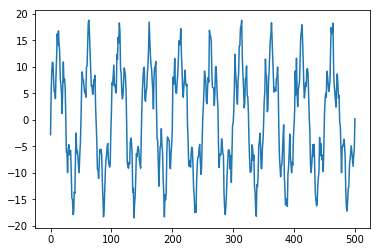

In [20]:
fs = 5000 #采样频率
ts = 1/fs #采样间隔
T = 0.1 #时长
N = fs*T + 1 #采样点
tn = np.linspace(0, T, N) #
fn = np.arange(len(tn))/(len(fn)-1)
fn = fs*fn

noise_power = 0.001 * fs / 2
time = np.arange(N) / fs

xn = 5*np.sin(2*np.pi*500*tn) + 12*np.sin(2*np.pi*100*tn) + np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

plt.plot(xn)

# Power Spectrum Density

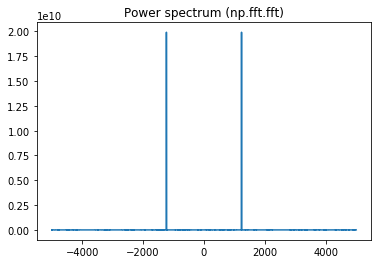

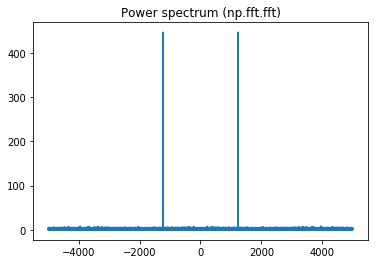

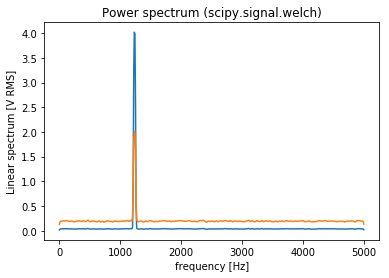

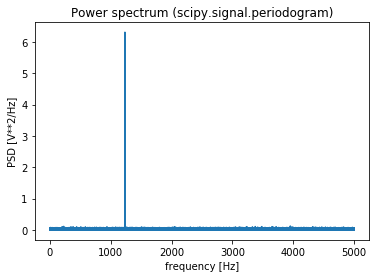

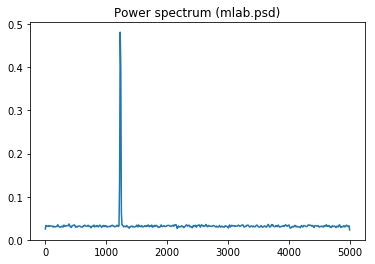

In [53]:
fs = 10e3
N = 1e5 #sample
NFFT = 1024
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

# np.fft.fft
freqs = np.fft.fftfreq(time.size, 1/fs)
idx = np.argsort(freqs)
ps = np.abs(np.fft.fft(x))**2
plt.figure()
plt.plot(freqs[idx], ps[idx])
plt.title('Power spectrum (np.fft.fft)')

freqs = np.fft.fftfreq(time.size, 1/fs)
idx = np.argsort(freqs)
ps = np.abs(np.fft.fft(x))**2/N
plt.figure()
plt.plot(freqs[idx], np.sqrt(ps[idx]))
plt.title('Power spectrum (np.fft.fft)')

# signal.welch
f, Pxx_spec = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.plot(f, Pxx_spec)
plt.plot(f, np.sqrt(Pxx_spec))
# plt.yscale('log')
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Power spectrum (scipy.signal.welch)')
plt.show()

f, Pxx_den = signal.periodogram(x, fs)
plt.figure()
# plt.plot(f, Pxx_den)
plt.plot(f, np.sqrt(Pxx_den))
# plt.yscale('log')
# plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.title('Power spectrum (scipy.signal.periodogram)')
plt.show()

Pxx, freqs = mlab.psd(x, Fs = fs, NFFT = NFFT)
plt.figure()
plt.plot(freqs, np.sqrt(Pxx),label='')
plt.title('Power spectrum (mlab.psd)')
plt.show()